In [2]:
import sys
sys.path.append("../../")
import csv
import matplotlib.pyplot as plt
import numpy as np
import focusadd
from focusadd.surface.Surface import Surface
from focusadd.coils.CoilSet import CoilSet
from focusadd.lossFunctions.DefaultLoss import default_loss
import numpy as np
import mayavi as maya
from mayavi import mlab
from functools import partial
mlab.init_notebook('x3d',800,800)

Notebook initialized with x3d backend.


In [6]:
surface = Surface("../../../focusadd/initFiles/axes/ellipticalAxis4Rotate.txt", 128, 32, 1.0)
coil_data_fil, params_fil = CoilSet.get_initial_data(surface, input_file="validate_rotating_ellipse.hdf5")
_, _, r_fil, _, l_fil = CoilSet.get_outputs(coil_data_fil, False, params_fil)
r_centroid_fil = CoilSet.get_r_centroid(coil_data_fil, False, params_fil)

In [8]:
def draw_coils(r_coils, color = "blue"):
    if color.lower() == "blue":
        tup = (0.0, 0.0, 0.8)
    elif color.lower() == "red":
        tup = (0.8, 0.0, 0.0)
    else:
        tup = (0.0, 0.8, 0.0)
    for ic in range(r_coils.shape[0]):
        for n in range(r_coils.shape[2]):
            for b in range(r_coils.shape[3]):
                p = mlab.plot3d(r_coils[ic,:,n,b,0], r_coils[ic,:,n,b,1], r_coils[ic,:,n,b,2], tube_radius = 0.004, line_width = 0.01, color = tup)
    return p
def draw_surface(surface):
    r = surface.get_r()
    x = r[:,:,0]
    y = r[:,:,1]
    z = r[:,:,2]
    p = mlab.mesh(x,y,z,color=(0.8,0.0,0.0))
    return p

mlab.clf()
draw_surface(Surface("../../../focusadd/initFiles/axes/ellipticalAxis4Rotate.txt", 128, 32, 1.0))
draw_coils(r_fil)

In [13]:
def compute_f_B(NZ, NT, NS):
    surface = Surface("../../../focusadd/initFiles/axes/ellipticalAxis4Rotate.txt", NZ, NT, 1.0)
    w_L = 0.1
    w_B = 1e3
    w_args = (w_B, w_L)
    coil_data_fil, params_fil = CoilSet.get_initial_data(surface, input_file="validate_rotating_ellipse.hdf5")
    NC, _, NF, NFR, ln, lb, NNR, NBR, rc, NR = coil_data_fil
    coil_data_fil = NC, NS, NF, NFR, ln, lb, NNR, NBR, rc, NR
    _, _, r_fil, _, l_fil = CoilSet.get_outputs(coil_data_fil, False, params_fil)
    r_centroid_fil = CoilSet.get_r_centroid(coil_data_fil, False, params_fil)
    surface_data = (surface.get_r_central(), surface.get_nn(), surface.get_sg())
    coil_output_func_fil = partial(CoilSet.get_outputs, coil_data_fil, False)
    loss_fil = default_loss(surface_data, coil_output_func_fil, w_args, params_fil)
    f_B = loss_fil - w_L * l_fil
    return f_B

In [23]:
NT = 32
NS = 64
NZs = [16, 32, 64, 96, 128, 256, 512, 1024, 2048]
f_Bs_NZ = []
for NZ in NZs:
    f_B = compute_f_B(NZ, NT, NS)
    f_Bs_NZ.append(f_B)

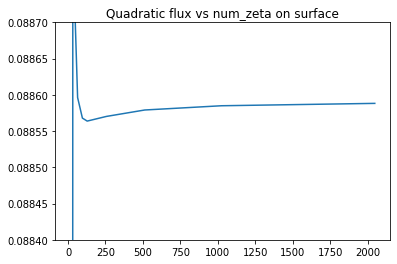

In [24]:
plt.plot(NZs, f_Bs_NZ)
plt.ylim([0.0884,0.0887])
plt.title("Quadratic flux vs num_zeta on surface")
plt.show()

In [26]:
float((f_Bs_NZ[-1] - f_Bs_NZ[4]) / f_Bs_NZ[4]) * 100

0.027592141281863262

In [27]:
NTs = [16, 32, 64, 96, 128, 192, 256, 320, 384, 448, 512]
NS = 64
NZ = 128
f_Bs_NT = []
for NT in NTs:
    f_B = compute_f_B(NZ, NT, NS)
    f_Bs_NT.append(f_B)

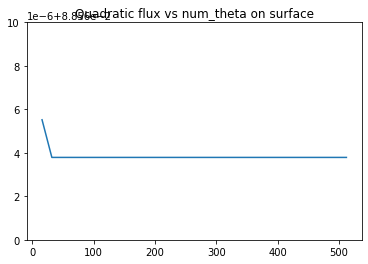

In [34]:
plt.plot(NTs, f_Bs_NT)
plt.ylim([0.08856,0.08857])
plt.title("Quadratic flux vs num_theta on surface")
plt.show()

In [32]:
float((f_Bs_NT[-1] - f_Bs_NT[1]) / f_Bs_NT[1]) * 100

-2.4247908250395257e-07

In [35]:
NT = 32
NSs = [16, 32, 64, 96, 128, 192, 256, 320, 384, 448, 512]
NZ = 128
f_Bs_NS = []
for NS in NSs:
    f_B = compute_f_B(NZ, NT, NS)
    f_Bs_NS.append(f_B)

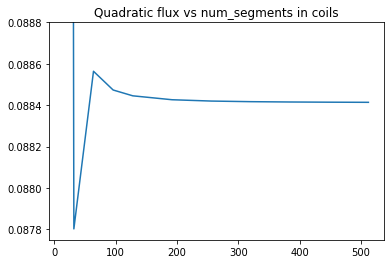

In [41]:
plt.plot(NSs, f_Bs_NS)
plt.ylim([0.08775,0.0888])
plt.title("Quadratic flux vs num_segments in coils")
plt.show()

In [42]:
float((f_Bs_NS[-1] - f_Bs_NS[4]) / f_Bs_NS[4]) * 100

-0.03550090185170663